# Supervised Learning - Building a Student Performace Prediction System


# Classification vs. Regression
The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

# Logistic Regression

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Question 1 - Exploring the Data (0.5 points)
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

#os.chdir("C:/Users\Aaryan/Documents/Python Scripts")
std = pd.read_csv("students-data.csv",delimiter = ';')
std.shape
std


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


# Question 2 - drop missing values (0.5 points)
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [134]:
 std.index.name = 'number'
 std  
 
std.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
std.shape

(395, 33)

# Transform Data

## Question 3 (0.5 points)

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [135]:

std.info
std1= std.select_dtypes(exclude ='int64')
std1.shape

(395, 17)

# Question 4 - Drop variables with less variance (0.5 points)

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

In [137]:
std.var() 


std3 = std.drop(labels = ["traveltime", "studytime", "failures", "famrel", "freetime","Dalc"], axis = 1)

std3.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10


#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Question 6 - Encode all categorical variables to numerical (0.5 points)

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [138]:
le = LabelEncoder()
# Categorical boolean mask
categorical_feature_mask = std.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = std.columns[categorical_feature_mask].tolist()


# apply le on categorical feature columns
std[categorical_cols] = std[categorical_cols].apply(lambda col: le.fit_transform(col))
std[categorical_cols].head(10)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0
5,0,1,1,1,1,3,2,3,1,0,1,1,1,1,1,1,0
6,0,1,1,1,1,2,2,1,1,0,0,0,0,1,1,1,0
7,0,0,1,0,0,2,4,1,1,1,1,0,0,1,1,0,0
8,0,1,1,1,0,3,2,1,1,0,1,1,0,1,1,1,0


# Question 7 - Convert the continuous values of grades into classes (1 point)

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [139]:
std['G1'] = np.where (std['G1']>=10,1,0)
std1.head()

std['G2'] = np.where (std['G2']>=10,1,0)
std['G3'] = np.where (std['G3']>=10,1,0)
std


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,0,1,1
5,0,1,16,1,1,1,4,3,3,2,...,5,4,2,1,2,5,10,1,1,1
6,0,1,16,1,1,1,2,2,2,2,...,4,4,4,1,1,3,0,1,1,1
7,0,0,17,1,0,0,4,4,2,4,...,4,1,4,1,1,1,6,0,0,0
8,0,1,15,1,1,0,3,2,3,2,...,4,2,2,1,1,1,0,1,1,1


# Question 8 (0.5 points)

*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate feature and target attributes into separate dataframes with X and y variable names.*

In [144]:
test_std1 = std
x = pd.DataFrame()
y = pd.DataFrame()
for column in test_std1.columns:
        if(column != 'G3'):
            x[column] = test_std1[column]
        else:
            y[column] = test_std1[column]
print(x)

print(y)


        school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
number                                                                        
0            0    0   18        1        0        0     4     4     0     4   
1            0    0   17        1        0        1     1     1     0     2   
2            0    0   15        1        1        1     1     1     0     2   
3            0    0   15        1        0        1     4     2     1     3   
4            0    0   16        1        0        1     3     3     2     2   
5            0    1   16        1        1        1     4     3     3     2   
6            0    1   16        1        1        1     2     2     2     2   
7            0    0   17        1        0        0     4     4     2     4   
8            0    1   15        1        1        0     3     2     3     2   
9            0    1   15        1        0        1     3     4     2     2   
10           0    0   15        1        0        1 

# Question 9 - Training and testing data split (0.5 points)

# *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [145]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
#X = std.values.reshape(-1,1)
#Y = Y.values.reshape(-1,1)
lm = linear_model.LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=300)
lm.fit(x_train, y_train)
print(x_train)
print(y_train)

        school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
number                                                                        
313          0    0   19        1        1        1     3     2     3     2   
392          1    1   21        0        0        1     1     1     2     2   
188          0    0   17        1        0        0     3     3     1     2   
384          1    1   18        0        0        1     4     2     2     2   
274          0    0   17        1        0        1     2     4     0     1   
385          1    0   18        0        0        1     2     2     0     2   
263          0    0   17        1        0        1     3     3     2     2   
66           0    1   15        1        0        0     4     4     2     3   
286          0    0   18        1        0        1     2     2     0     0   
90           0    0   16        1        0        1     3     3     2     2   
346          0    1   18        0        0        1 

# Question 10 - Model Implementation and Testing the Accuracy (0.5 points)

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*
#### Answer:

In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
lg1 = LogisticRegression()
#g1.fit(x_train,y_train)
lg1.fit(x_train, y_train)

C:\Users\Aaryan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aaryan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [150]:
lg1.score(x_train,y_train)

0.9222972972972973

In [152]:
lg1.score(x_test,y_test)

0.9292929292929293

# Question 11 - Print the intercept of the Logistic regression model (0.5 points)

The value of the intercepts are stored in the model itself. You can use .intercept_ function to do the same

In [153]:
lg1.intercept_

array([0.43211515])

# Question 12 - Print the coefficients of the model (0.5 points) and name the coefficient which has the highest impact on the dependent variable (0.5 points)

Hint: Use .coef_ to get the coefficients and use pd.Dataframe to store the coefficients in a dataframe with column names same as the independent variable dataframe

In [155]:
Coef = lg1.coef_

In [156]:
Coef

array([[-0.16867582, -0.256599  , -0.26503625, -0.04635457, -0.12632179,
        -0.56055497,  0.20497592, -0.34091886, -0.10864167,  0.19028438,
         0.17028305,  0.58664931, -0.06143281, -0.07950115, -0.24655827,
        -0.40770173, -0.2919395 ,  0.3461187 , -0.41274345, -0.00767366,
         0.88229643, -0.08582817, -0.57588772,  0.56941804,  0.10511185,
        -0.3273834 , -0.54461054,  0.74113757, -0.02876657, -0.02286825,
         1.59069641,  3.73680376]])

In [157]:
coefs_logic = pd.DataFrame(Coef,columns=x.columns)
coefs_logic.T

,0
school,-0.168676
sex,-0.256599
age,-0.265036
address,-0.046355
famsize,-0.126322
Pstatus,-0.560555
Medu,0.204976
Fedu,-0.340919
Mjob,-0.108642
Fjob,0.190284


# Question 13 - Predict the dependent variable for both training and test dataset (0.5 points)

Accuracy score() should help you to print the accuracies

In [158]:
lg1.predict(x_test)

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [159]:
lg1.predict(x_train)

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [160]:
lg1.score(x_train,y_train)

0.9222972972972973

In [161]:
lg1.score(x_test,y_test)

0.9292929292929293

# Information about the dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Attribute Information
1. ID - ID number of the image
2. Clump Thickness - 1 to 10
3. Cell Size - 1 to 10
4. Cell Shape - 1 to 10
5. Marginal Adhesion - 1 to 10
6. Single Epethelial cell size - 1 to 10
7. Bare nuclei - 1 to 10 
8. Normal Nucleoli - 1 to 10
9. Bland Chromatin - 1 to 10
10. Mitosis - 1 to 10
 
Class - Dependent Variable - 2 for benign 4 for malignant

### Read the data given in bc2.csv file

In [195]:
import pandas as pd

bc = pd.read_csv('C:/Users/Aaryan/Downloads/bc.csv')

bc.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Observe the no.of records in dataset and type of each feature 

In [199]:
bc.dtypes
bc.shape

(699, 11)

### Use summary statistics to check if missing values, outlier and encoding treament is necessary


In [201]:
bc.describe(include = 'all')

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


### Check Missing Values

C:\Users\Aaryan\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


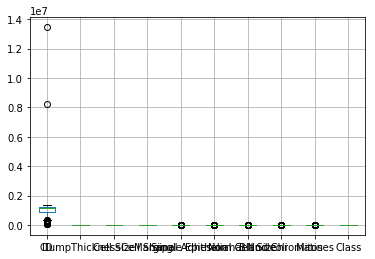

In [202]:
bc.boxplot(grid = 'True')

### Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [203]:
bc['Bare Nuclei'] = bc['Bare Nuclei'].map(lambda x: x if x!= '?' else 1)
bc['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
1      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

### Print and plot the distribution of target variable (Class - using Histogram) 

(array([458.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 241.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <a list of 10 Patch objects>)

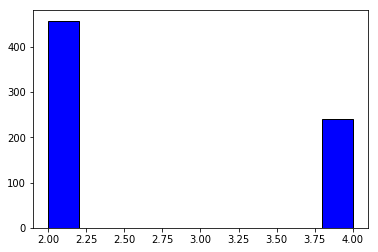

In [206]:
plt.hist(bc['Class'], color = 'blue', edgecolor = 'black')

### convert the datatype of Bare Nuclei to `int`

In [207]:
bc['Bare Nuclei'] = pd.to_numeric(bc['Bare Nuclei'])
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


### Standardization of Data (Use Standard Scaler)

In [211]:

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit_transform(bc)


C:\Users\Aaryan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aaryan\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.11623873,  0.20693572, -0.69999505, ..., -0.61182504,
        -0.34391178, -0.72539705],
       [-0.1115035 ,  0.20693572,  0.28384518, ..., -0.28411186,
        -0.34391178, -0.72539705],
       [-0.09126525, -0.50386559, -0.69999505, ..., -0.61182504,
        -0.34391178, -0.72539705],
       ...,
       [-0.29657482,  0.20693572,  2.25152563, ...,  2.33759359,
         0.23956962,  1.37855538],
       [-0.28254589, -0.14846494,  1.59563215, ...,  1.02674087,
        -0.34391178,  1.37855538],
       [-0.28254589, -0.14846494,  1.59563215, ...,  0.37131451,
        -0.34391178,  1.37855538]])

In [216]:
bc = pd.DataFrame(bc, columns = ['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'])

### Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them. (Use pd.scatter matrix())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002F6E8B23CC0>,
      dtype=object)

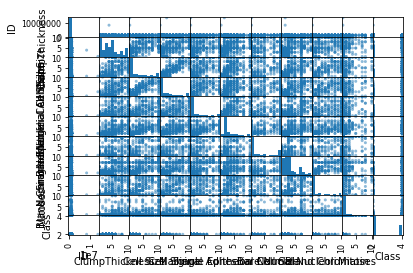

In [218]:
import pandas
from pandas.plotting import scatter_matrix
scatter_matrix(pd.DataFrame(bc))


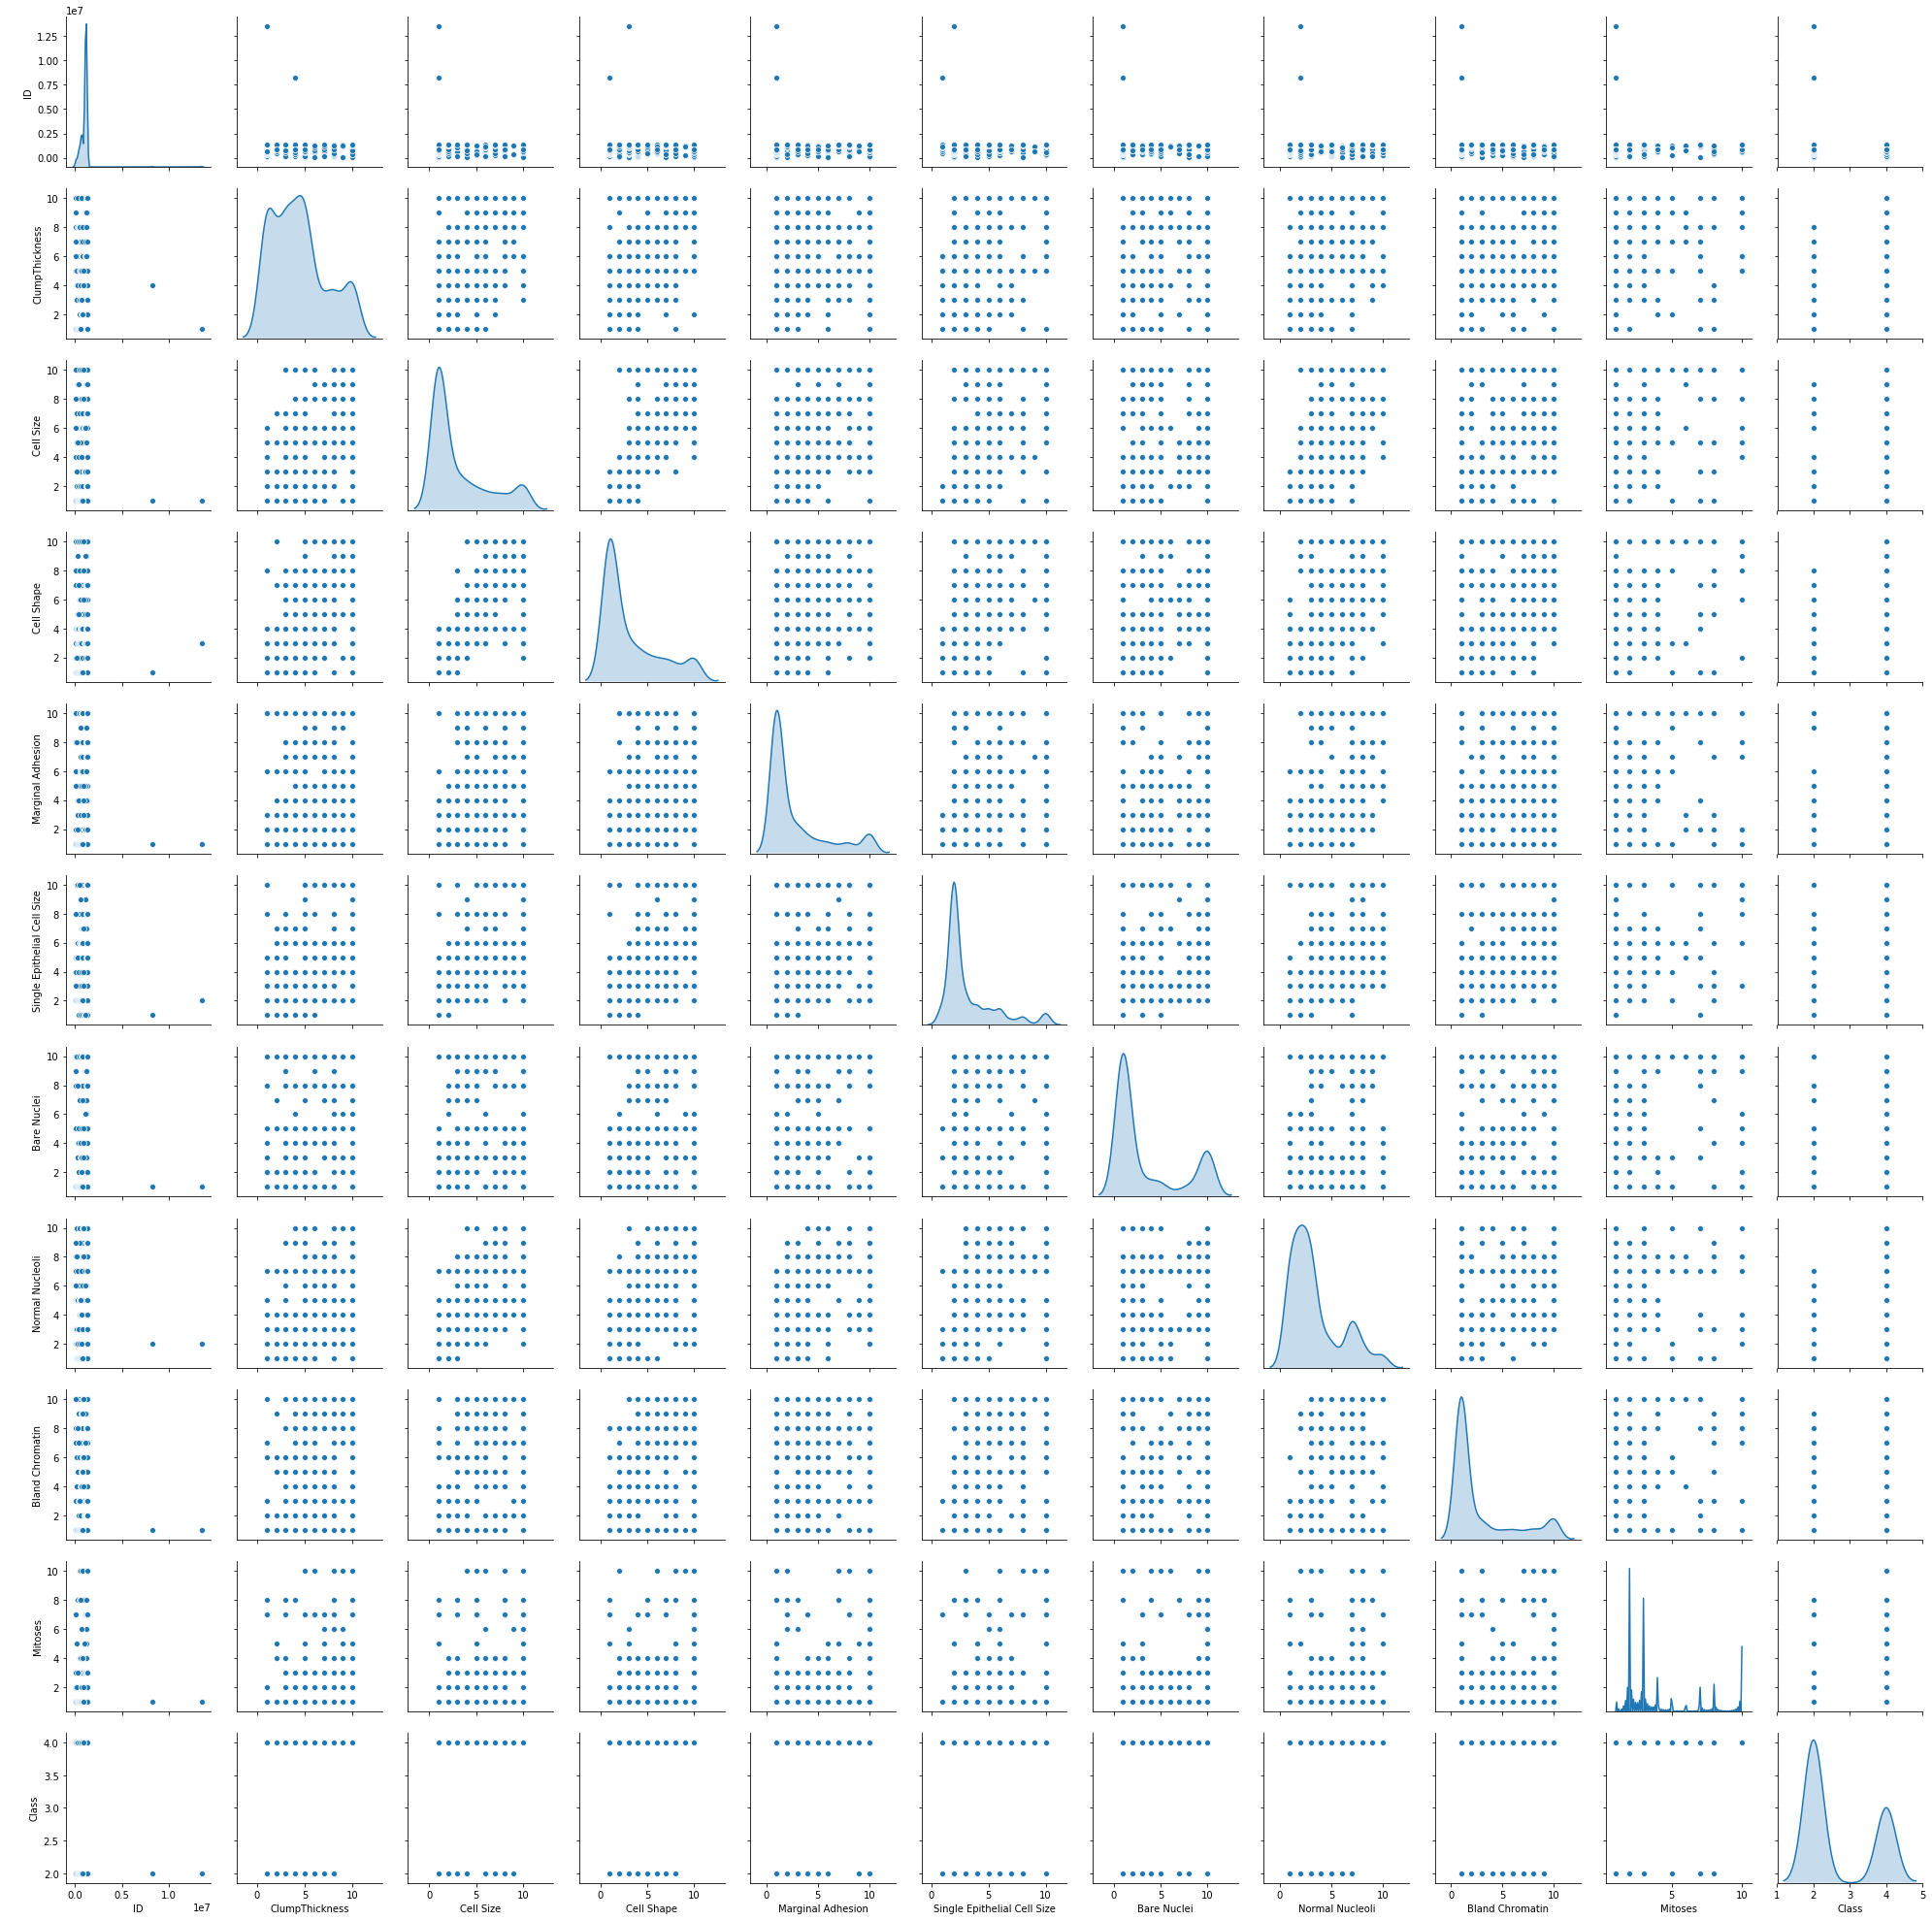

In [220]:
import seaborn as sns
sns.pairplot(bc, diag_kind='kde')

In [221]:
bc.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


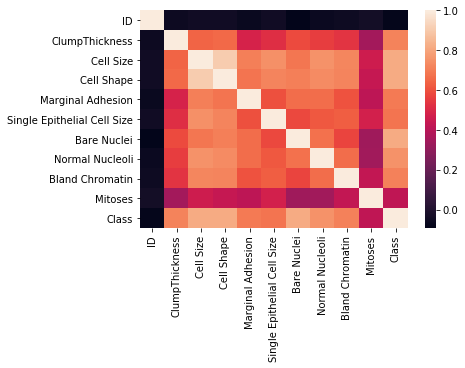

In [222]:
sns.heatmap(bc.corr())

### Divide the dataset into feature set and target set

In [224]:
X = bc
Y = bc['Class']
X.drop(columns = 'Class')

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,1000025,5,1,1,1,2,1,3,1,1
1,1002945,5,4,4,5,7,10,3,2,1
2,1015425,3,1,1,1,2,2,3,1,1
3,1016277,6,8,8,1,3,4,3,7,1
4,1017023,4,1,1,3,2,1,3,1,1
5,1017122,8,10,10,8,7,10,9,7,1
6,1018099,1,1,1,1,2,10,3,1,1
7,1018561,2,1,2,1,2,1,3,1,1
8,1033078,2,1,1,1,2,1,1,1,5
9,1033078,4,2,1,1,2,1,2,1,1


### Divide the Training and Test sets in 70:30 

In [225]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

print(x_train)

        school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
number                                                                        
280          0    1   17        1        1        0     4     1     3     2   
236          0    1   17        1        1        1     2     2     2     2   
275          0    0   17        1        1        1     2     2     3     2   
13           0    1   15        1        0        1     4     3     4     2   
332          0    0   18        1        0        1     3     3     3     3   
320          0    0   17        1        0        0     4     3     3     3   
274          0    0   17        1        0        1     2     4     0     1   
25           0    0   16        1        0        1     2     2     3     3   
361          1    1   18        0        1        1     1     1     0     2   
240          0    1   17        1        1        1     4     3     1     2   
146          0    0   15        1        0        1 

### Model 1 : Implement a default Decision Tree model with no attributes

In [245]:
from sklearn.tree import DecisionTreeClassifier 


decision = DecisionTreeClassifier()
decision.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Check the feature importances of the Decision Tree model

In [246]:
importances = decision.feature_importances_
importances

array([0.        , 0.        , 0.01152582, 0.        , 0.00819721,
       0.00731894, 0.        , 0.02713407, 0.02067441, 0.00710425,
       0.        , 0.        , 0.01641002, 0.01092961, 0.00857045,
       0.0334417 , 0.        , 0.00768676, 0.        , 0.        ,
       0.        , 0.0196733 , 0.02049302, 0.01284917, 0.01092961,
       0.00322012, 0.        , 0.0262089 , 0.        , 0.02810471,
       0.01672804, 0.70279988])

### Check the training & test accuracy of model 1 

In [247]:
decision.score(x_train,y_train)

1.0

In [252]:
decision.score(x_test,y_test)

0.8487394957983193

### Model 2: Implement a decision tree with depth of the tree = 10 and leaf nodes = 5

In [249]:
decision1=DecisionTreeClassifier(max_depth=10,max_leaf_nodes=5)
decision1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Check the training & test accuracy of model 2

In [250]:
decision1.score(x_train,y_train)

0.9347826086956522

In [251]:
decision1.score(x_test,y_test)

0.8991596638655462

### Print the confusion matrix of model 1 and model 2

In [255]:
from sklearn.metrics import confusion_matrix
y_pred = decision.predict(x_test)
y_true = decision.predict(x_test)

confusion_matrix(y_pred,y_test)

array([[29,  8],
       [10, 72]], dtype=int64)

In [257]:
y_pred1 = decision1.predict(x_test)
y_true1 = decision1.predict(x_test)

confusion_matrix(y_pred1,y_test)

array([[34,  7],
       [ 5, 73]], dtype=int64)